In [3]:
#clone darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13218, done.
remote: Total 13218 (delta 0), reused 0 (delta 0), pack-reused 13218
Receiving objects: 100% (13218/13218), 11.91 MiB | 6.38 MiB/s, done.
Resolving deltas: 100% (9042/9042), done.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
#Show all my google drive contents
#%cd ..
#Symlink
!ln -s /content/drive/My\ Drive/ mydrive
!ls mydrive/

'~.'
'6 (1).txt'
'6 (2).txt'
 6.txt
'7 (1).txt'
 7.txt
'Bangladesh-Armed-Forces(162-15-7850) (1).docx'
'Bangladesh-Armed-Forces(162-15-7850) (2).docx'
'Bangladesh-Armed-Forces(162-15-7850) (3).docx'
'Bangladesh-Armed-Forces(162-15-7850) (4).docx'
'Bangladesh-Armed-Forces(162-15-7850) (5).docx'
'Bangladesh-Armed-Forces(162-15-7850).docx'
 Classroom
'Colab Notebooks'
 Defense
'Getting started.pdf'
'Hostel Management System.zip'
 ImageListView.zip
'IMG_20181105_112543 (1).jpg'
 IMG_20181105_112543.jpg
 Lab_Assignmennt.sh
'Lecture 5 Introduction to Probability Distribution (1).gdoc'
'Lecture 5 Introduction to Probability Distribution.gdoc'
 mlproject.gsite
'Office 2016'
'OpenGL Class'
 q3.txt
 Software
 Weapon-Detection
 yolov3


In [6]:
!ls

darknet  drive	mydrive  sample_data


In [0]:
!cp mydrive/yolov3/yolov3.weights /../content/darknet

In [7]:
#change makefile for gpu and opencv
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile


/content/darknet


In [8]:
#cuda verification
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [9]:
#build darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unuse

In [0]:
#getting pretrained weights of coco
#!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
%cd ..
%cd /content/
!ls
!cp mydrive/yolov3/yoloTest.jpg ../content/darknet

/content
/content
darknet  drive	mydrive  sample_data


In [0]:
!pwd

/content/darknet


In [0]:
upload()

Saving w2.jpg to w2.jpg
saved file w2.jpg


[Errno 20] Not a directory: 'darknet/'
/content/darknet
 CUDA-version: 10000 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 S

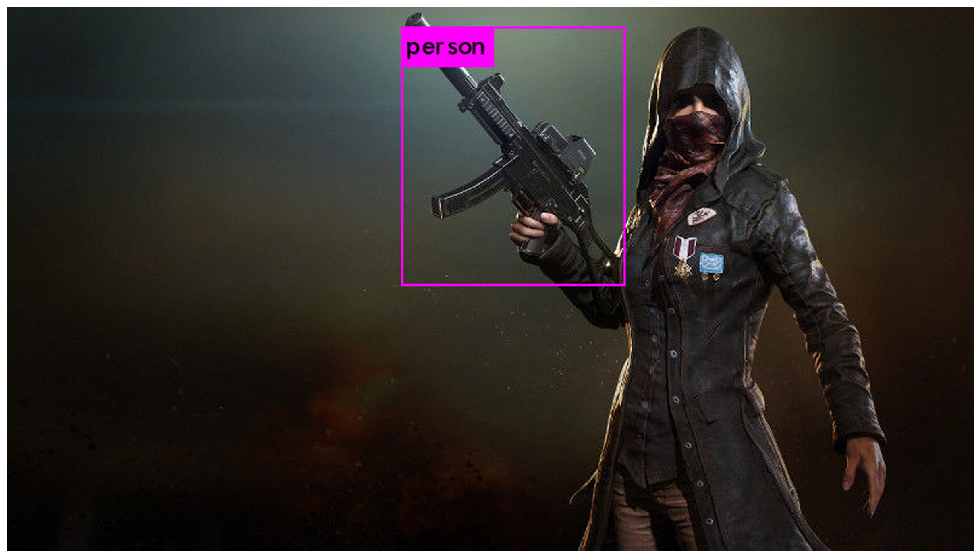

In [0]:
#test compiled darknet using image from drive

%cd darknet/
!./darknet detect /../content/mydrive/yolov3/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights w2.jpg
imShow('predictions.jpg')

In [0]:
#copy obj.zip(custom labeled image dataset) to root folder from drive
%cd ..
%cd /content/
!ls
!cp mydrive/yolov3/obj.zip ../

/content
/content
darknet  drive	mydrive  sample_data


In [0]:
#unzipping the obj.zip to darknet/data directory
!unzip ../obj.zip -d darknet/data/

Streaming output truncated to the last 5000 lines.
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06751.jpg  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06751.txt  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06761.jpg  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06761.txt  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06791.jpg  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06791.txt  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06801.jpg  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06801.txt  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun-fight-with-police-movie-cube06811.jpg  
  inflating: darknet/data/obj/den-of-thieves2018-final-gun

In [0]:
#copy the custom cfg file to darknet/cfg
%cd ..
%cd content/
!cp mydrive/yolov3/yolov3_obj.cfg darknet/cfg

/content
[Errno 2] No such file or directory: 'content/'
/content


In [0]:
!pwd

/content


In [0]:
#copy custom obj.data, obj.names and train.txt to darknet/data
!cp mydrive/yolov3/obj.data darknet/data/
!cp mydrive/yolov3/obj.names darknet/data/
!cp mydrive/yolov3/train.txt darknet/data/

In [0]:
!ls darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.names	     train.txt
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names  voc.names
coco.names  goal.txt	 labels			   person.jpg
dog.jpg     horses.jpg	 obj.data		   scream.jpg


In [0]:
#copy darknet53.conv.74, the pretrained weights from drive to darknet
#!cp mydrive/yolov3/darknet53.conv.74 darknet/

In [0]:
!pwd

/content


In [0]:
%cd darknet/
!ls

/content/darknet
3rdparty      cmake		      image_yolov2.sh	     obj
appveyor.yml  CMakeLists.txt	      image_yolov3.sh	     README.md
backup	      darknet		      include		     results
build	      DarknetConfig.cmake.in  json_mjpeg_streams.sh  scripts
build.ps1     darknet.py	      LICENSE		     src
build.sh      darknet_video.py	      Makefile		     video_v2.sh
cfg	      data		      net_cam_v3.sh	     video_yolov3.sh


In [0]:
!pwd

/content/darknet


In [0]:
!./darknet detector train data/obj.data cfg/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.727822, GIOU: 0.722920), Class: 0.987135, Obj: 0.210436, No Obj: 0.000828, .5R: 1.000000, .75R: 0.500000, count: 6, class_loss = 1.217331, iou_loss = 0.353587, total_loss = 1.570918 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: -nan, GIOU: -nan), Class: -nan, Obj: -nan, No Obj: 0.000029, .5R: -nan, .75R: -nan, count: 0, class_loss = 0.004936, iou_loss = 0.000000, total_loss = 0.004936 
Can't open label file. (This can be normal only if you use MSCOCO): data/obj/Top10GunFightsinMovies13411.txt 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.788753, GIOU: 0.774820), Class: 0.999961, Obj: 0.982513, No Obj: 0.001242, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.000409, iou_loss = 0.012883, total_loss = 0.013292 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.794644, GIOU: 0.787889), Clas

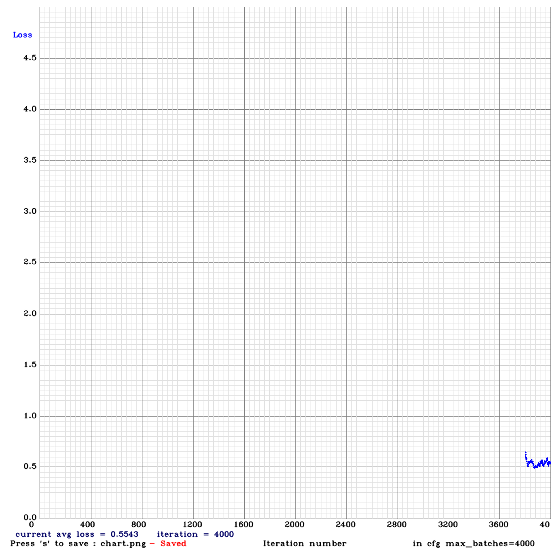

In [0]:
imShow("chart.png")

In [0]:
%cd ..
%cd /content/
!ls
!cp mydrive/yolov3/weapon.jpg ../content/darknet

/
/content
darknet  drive	mydrive  sample_data
cp: cannot stat 'mydrive/yolov3/weapon.jpg': No such file or directory


In [0]:
!pwd

/content


In [0]:
%cd darknet/cfg/
!sed -i 's/batch=64/batch=1/' yolov3_obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [0]:
!pwd

/content/darknet


In [0]:
upload()

Saving test1.mp4 to test1.mp4


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-5b1249ff8ad0>", line 1, in <module>
    upload()
  File "<ipython-input-8-bc0d7abbb3bf>", line 19, in upload
    uploaded = files.upload()
  File "/usr/local/lib/python3.6/dist-packages/google/colab/files.py", line 72, in upload
    output_id=output_id))
  File "/usr/local/lib/python3.6/dist-packages/google/colab/output/_js.py", line 39, in eval_js
    return _message.read_reply_from_input(request_id)
  File "/usr/local/lib/python3.6/dist-packages/google/colab/_message.py", line 101, in read_reply_from_input
    time.sleep(0.025)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = v

KeyboardInterrupt: ignored

 CUDA-version: 10000 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

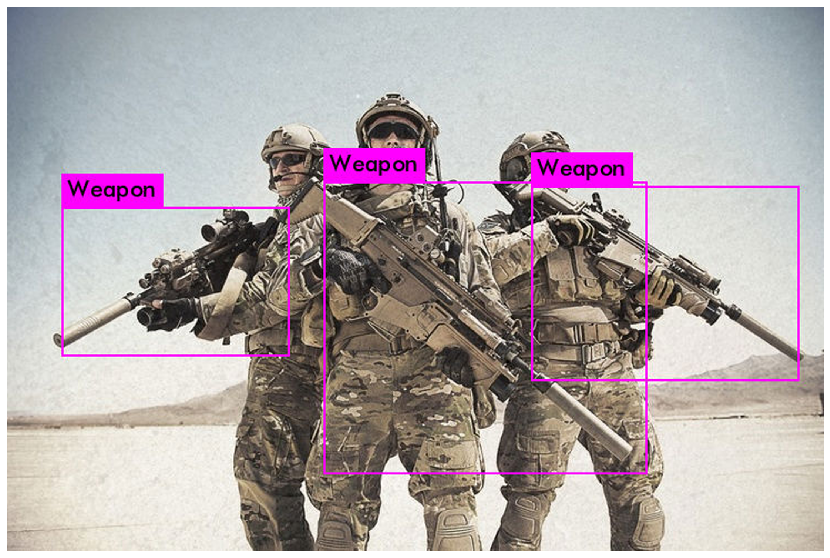

In [0]:
!./darknet detector test data/obj.data cfg/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights w6.jpg
imShow("predictions.jpg")

In [2]:
!./darknet detector map cfg/coco.data cfg/yolov3.cfg yolov3.weights -points 101 -iou_thresh 0.5 or 0.75

/bin/bash: ./darknet: No such file or directory


In [0]:
from google.colab import files
files.download("predictions.jpg") 

In [0]:
def forward(self, x, targets=None):
    img_dim = x.shape[2]
    loss = 0
    layer_outputs, yolo_outputs = [], []
    intermediate_features = []
    for i, (module_def, module) in enumerate(zip(self.module_defs, self.module_list)):
        if module_def["type"] in ["convolutional", "upsample", "maxpool"]:
            x = module(x)
            # Extract features at some layers
            if i in [80, 90, 100]:
                intermediate_features.append(x)
        elif module_def["type"] == "route":
            x = torch.cat([layer_outputs[int(layer_i)] for layer_i in module_def["layers"].split(",")], 1)
        elif module_def["type"] == "shortcut":
            layer_i = int(module_def["from"])
            x = layer_outputs[-1] + layer_outputs[layer_i]
        elif module_def["type"] == "yolo":
            x, layer_loss = module[0](x, targets, img_dim)
            loss += layer_loss
            yolo_outputs.append(x)
        layer_outputs.append(x)
    yolo_outputs = to_cpu(torch.cat(yolo_outputs, 1))
    return (yolo_outputs, intermediate_features) if targets is None else (loss, yolo_outputs, intermediate_features)

In [0]:
imShow(forward(predictions.jpg, targets=None))

NameError: ignored

In [0]:
import cv2

In [0]:
cv2.__version__

'4.1.2'

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [0]:
!./darknet detector demo data/obj.data cfg/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights -c 0

Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

In [0]:
!./darknet detector demo data/obj.data cfg/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights -dont_show /../content/mydrive/yolov3/test1.mp4 -out_filename result1.mp4

Streaming output truncated to the last 5000 lines.

FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.4 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.4 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.2 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.2 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.2 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.3 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.2 	 AVG_FPS:14.4

 cvWriteFrame 
Objects:


FPS:14.2 	 AVG_FPS:14.4

 cvWr

In [0]:
from google.colab import files
files.download("result1.mp4") 

KeyboardInterrupt: ignored

In [0]:
!cp result1.mp4 ../mydrive/yolov3/

In [31]:
!pwd

/content/darknet


In [0]:
!cp /../content/mydrive/yolov3/obj.names /../content/darknet/data/
!cp /../content/mydrive/yolov3/test.txt /../content/darknet/data/
!cp /../content/mydrive/yolov3/test-obj/obj.zip /../

In [33]:
!unzip /../obj.zip -d /../content/darknet/data/

Archive:  /../obj.zip
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(12).jpg  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(12).txt  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(13).jpg  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(13).txt  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(15).jpg  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(15).txt  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(2).jpg  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(2).txt  
  inflating: /../content/darknet/data/obj/DramaticnewCCTVfootagerevealshorrorofKenyamallmassacre(22).jpg  
  inflating: /../

mAP and Accuracy calculation

In [34]:
!./darknet detector map /../content/mydrive/yolov3/obj.data /../content/mydrive/yolov3/yolov3_obj.cfg /../content/mydrive/yolov3/backup/yolov3_obj_last.weights

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 compute_capability = 370, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 